<a href="https://colab.research.google.com/github/prakash-tech89/Data-Science/blob/master/Image_recognization_using_deep_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%cp -r  '/content/drive/MyDrive/employee_train/' '/content/sample_data/'
%cp -r  '/content/sample_data/employee_train/' '/content/drive/MyDrive/employee_train/'

In [ ]:
datasetdir = '/content/sample_data/employee_train/'
import os
os.chdir(datasetdir)

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 30

def generators(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.1,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ('gts0001_sam_walton','gts6093_nagarjun','gts6410_john_hammond','gts6430_ian_malcolm','gts6444_ellie_sattler','gts6453_prakash'),
        batch_size = batch_size,
        subset = 'training', 
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ('gts0001_sam_walton','gts6093_nagarjun','gts6410_john_hammond','gts6430_ian_malcolm','gts6444_ellie_sattler','gts6453_prakash'),
        batch_size = batch_size,
        subset = 'validation'
    )
    return train_dataset, val_dataset
    

In [ ]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

In [ ]:
vgg16 = keras.applications.vgg16
vgg = vgg16.VGG16(weights='imagenet')
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)
conv_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
from keras.preprocessing import image

img_path = '/content/sample_data/employee_train/gts6410_john_hammond/85975.jpg'

# loading the image: 
img = image.load_img(img_path, target_size=(224, 224))
# turn it into a numpy array
x = image.img_to_array(img)
print(np.min(x), np.max(x))
print(x.shape)
# expand the shape of the array, 
# a new axis is added at the beginning:
xs = np.expand_dims(x, axis=0)
print(xs.shape)
# preprocess input array for VGG16
xs = vgg16.preprocess_input(xs)
# evaluate the model to extract the features
features = conv_model.predict(xs)
print(features.shape)

0.0 255.0
(224, 224, 3)
(1, 224, 224, 3)
(1, 7, 7, 512)


In [ ]:
train_dataset, val_dataset = generators((224,224), preprocessing=vgg16.preprocess_input)

Found 163 images belonging to 6 classes.
Found 15 images belonging to 6 classes.


In [ ]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with two categories (dog and cat)
predictions = keras.layers.Dense(6, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
for layer in conv_model.layers:
    layer.trainable = False

In [ ]:
full_model.summary()


Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=5,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
6/6 [==============================] - 93s 15s/step - loss: 5.0398 - acc: 0.4674 - val_loss: 0.8696 - val_acc: 0.8667
Epoch 2/5
6/6 [==============================] - 90s 15s/step - loss: 0.9153 - acc: 0.9035 - val_loss: 0.4257 - val_acc: 0.8667
Epoch 3/5
6/6 [==============================] - 90s 15s/step - loss: 0.1953 - acc: 0.9794 - val_loss: 0.4655 - val_acc: 0.9333
Epoch 4/5
6/6 [==============================] - 90s 15s/step - loss: 0.0291 - acc: 0.9972 - val_loss: 0.7614 - val_acc: 0.8000
Epoch 5/5
6/6 [==============================] - 91s 17s/step - loss: 0.0086 - acc: 1.0000 - val_loss: 0.2552 - val_acc: 0.8667


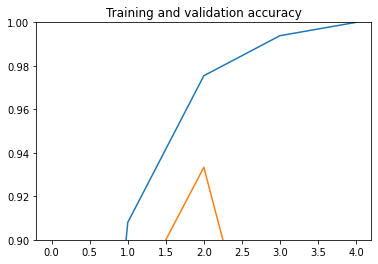

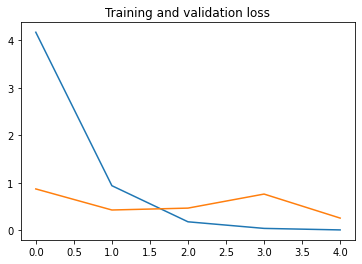

In [ ]:
plot_history(history, yrange=(0.9,1))

In [ ]:
vgg19 = keras.applications.vgg19
conv_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in conv_model.layers: 
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(6, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [ ]:
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=5,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
6/6 [==============================] - 114s 19s/step - loss: 6.9545 - acc: 0.2289 - val_loss: 1.1381 - val_acc: 0.6667
Epoch 2/5
6/6 [==============================] - 113s 19s/step - loss: 1.5239 - acc: 0.7247 - val_loss: 0.1705 - val_acc: 0.8667
Epoch 3/5
6/6 [==============================] - 113s 21s/step - loss: 0.1562 - acc: 0.9534 - val_loss: 0.2012 - val_acc: 0.9333
Epoch 4/5
6/6 [==============================] - 113s 19s/step - loss: 0.2942 - acc: 0.9407 - val_loss: 0.1575 - val_acc: 0.9333
Epoch 5/5
6/6 [==============================] - 115s 19s/step - loss: 0.1138 - acc: 0.9781 - val_loss: 0.1221 - val_acc: 0.9333


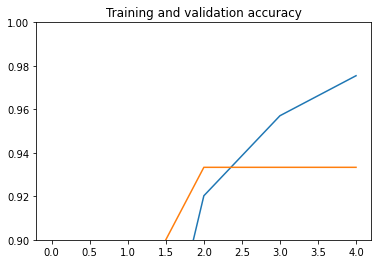

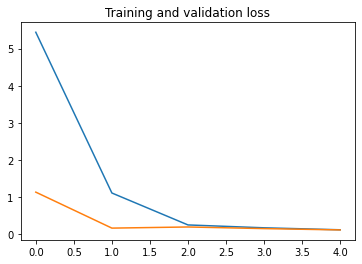

In [ ]:
plot_history(history, yrange=(0.9,1))


In [ ]:
resnet50 = keras.applications.resnet50
train_dataset, val_dataset = generators((224,224), preprocessing=resnet50.preprocess_input)

Found 163 images belonging to 6 classes.
Found 15 images belonging to 6 classes.


In [ ]:
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(500, activation='relu')(x)
predictions = keras.layers.Dense(6, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_39[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=5,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
6/6 [==============================] - 35s 5s/step - loss: 24.9558 - acc: 0.2822 - val_loss: 12.2226 - val_acc: 0.6000
Epoch 2/5
6/6 [==============================] - 31s 5s/step - loss: 10.9466 - acc: 0.4976 - val_loss: 2.0260 - val_acc: 0.9333
Epoch 3/5
6/6 [==============================] - 31s 5s/step - loss: 2.6267 - acc: 0.8108 - val_loss: 0.9974 - val_acc: 0.7333
Epoch 4/5
6/6 [==============================] - 31s 5s/step - loss: 0.1650 - acc: 0.9428 - val_loss: 1.0160 - val_acc: 0.8667
Epoch 5/5
6/6 [==============================] - 31s 5s/step - loss: 0.0751 - acc: 0.9793 - val_loss: 0.0683 - val_acc: 0.9333


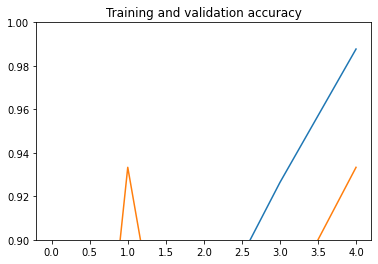

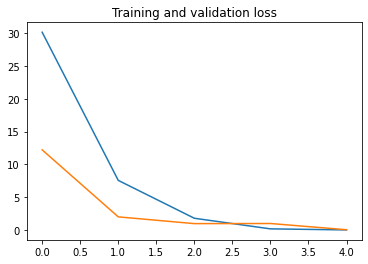

In [ ]:
plot_history(history, yrange=(0.9,1))


In [ ]:
full_model.save_weights('resnet50.h5')
full_model.save('network.h5') 

[[4.9209895e-15 6.5409247e-11 7.2551840e-11 8.6074247e-13 2.9113607e-19
  1.0000000e+00]]

Welcome  prakash


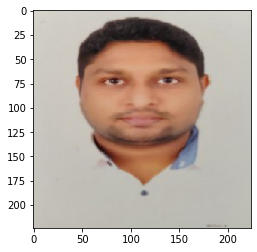

In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

img_path = '/content/sample_data/employee_train/gts6453_prakash/MY_PIC_new1.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(full_model.predict(x))
print()
plt.imshow(img)
pred = full_model.predict(x)
pred = pred.argmax(axis=1)[0]
user_list=['gts0001_sam_walton','gts6093_nagarjun','gts6410_john_hammond','gts6430_ian_malcolm','gts6444_ellie_sattler','gts6453_prakash']
print("Welcome ",user_list[pred].split("_")[1])

[[1.0000000e+00 4.5487550e-13 5.6575822e-10 8.6952759e-13 2.0601458e-18
  5.8385745e-18]]

Welcome  sam !!!
employee Id : gts0001


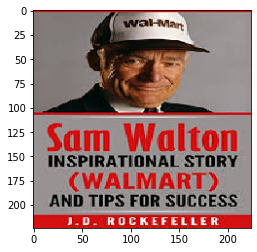

In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

def predict_new_image(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  print(full_model.predict(x))
  print()
  plt.imshow(img)
  pred = full_model.predict(x)
  pred = pred.argmax(axis=1)[0]
  user_list=['gts0001_sam_walton','gts6093_nagarjun','gts6410_john_hammond','gts6430_ian_malcolm','gts6444_ellie_sattler','gts6453_prakash']
  print("Welcome ",user_list[pred].split("_")[1],"!!!")
  return user_list[pred].split("_")[0]
img_path = '/content/sample_data/employee_train/gts0001_sam_walton/sam_walton_input3.jpg'
emp_id=predict_new_image(img_path) 
print("employee Id :",emp_id)

In [ ]:
import sys

def true_and_predicted_labels(dataset):
    labels = np.zeros((dataset.n,6))
    preds = np.zeros_like(labels)
    for i in range(len(dataset)):
        sys.stdout.write('evaluating batch {}\r'.format(i))
        sys.stdout.flush()
        batch = dataset[i]
        batch_images = batch[0]
        batch_labels = batch[1]
        batch_preds = full_model.predict(batch_images)
        start = i*batch_size
        labels[start:start+batch_size] = batch_labels
        preds[start:start+batch_size] = batch_preds
    return labels, preds

train_labels, train_preds = true_and_predicted_labels(train_dataset)

In [ ]:
threshold = 0.5

def predicted_labels(preds, threshold):
    '''Turn predictions (floats in the last two dimensions) 
    into labels (0 or 1).'''
    pred_labels = np.zeros_like(preds)
    # cat score lower than threshold: set dog label to 1
    # cat score higher than threshold: set dog label to 0
    pred_labels[:,0] = preds[:,1]<threshold
    # cat score higher than threshold: set cat label to 1
    # cat score lower than threshold: set cat label to 0
    pred_labels[:,1] = preds[:,1]>=threshold
    return pred_labels

train_pred_labels = predicted_labels(train_preds, threshold)
print('predicted labels:')
print(train_pred_labels)
print('true labels:')
print(train_labels)

predicted labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.

In [ ]:
def misclassified(labels, pred_labels, print_report=True):
    def report(categ, n_misclassified, n_examples): 
        print('{:<4} {:>3} misclassified samples ({:4.2f}%)'.format(
            categ,
            n_misclassified, 
            100*(1-float(n_misclassified)/n_examples))
        )
    # total number of examples
    n_examples = len(labels)
    # total number of john
    john = sum(labels[:,2])
    # total number of ian
    ian = sum(labels[:,3])
    # total number of elli
    ellie = sum(labels[:,4])
    # total number of prakasj
    prakash = sum(labels[:,5])
    # total number of sam
    sam = sum(labels[:,0])
    # total number of sam
    nag = sum(labels[:,1])
    # boolean mask for misidentified examples
    mask_all = pred_labels[:,0] != labels[:,0]
    # boolean mask for misidentified john    
    mask_john = np.logical_and(mask_all,labels[:,1]>0.5)
    # boolean mask for misidentified ian    
    mask_ian = np.logical_and(mask_all,labels[:,3]>0.5)
    # boolean mask for misidentified ellie    
    mask_ellie = np.logical_and(mask_all,labels[:,4]>0.5)
    # boolean mask for misidentified prakash   
    mask_prakash = np.logical_and(mask_all,labels[:,5]>0.5)
    # boolean mask for misidentified sam   
    mask_sam = np.logical_and(mask_all,labels[:,0]>0.5)
    # boolean mask for misidentified sam   
    mask_naga = np.logical_and(mask_all,labels[:,1]>0.5)


    if print_report:
        report('all', sum(mask_all), n_examples)
        report('john', sum(mask_john), john)
        report('ian', sum(mask_ian), ian)
        report('ellie', sum(mask_ellie), ellie)
        report('prakash', sum(mask_prakash), prakash)
        report('sam', sum(mask_sam), sam)
        report('nag', sum(mask_naga), nag)

    return mask_all, mask_john, mask_ian,mask_ellie, mask_prakash, mask_sam

_ = misclassified(train_labels, train_pred_labels)

all  146 misclassified samples (6.41%)
john   0 misclassified samples (100.00%)
ian   76 misclassified samples (0.00%)
ellie   0 misclassified samples ( nan%)
prakash   7 misclassified samples (0.00%)
sam    0 misclassified samples (100.00%)
nag    0 misclassified samples (100.00%)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [ ]:
%cp '/content/sample_data/employee_train/network.h5' '/content/drive/MyDrive/employee_train/'
%cp '/content/sample_data/employee_train/resnet50.h5' '/content/drive/MyDrive/employee_train/'
